In [93]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


In [94]:
xbar = 12.20

In [95]:
mu = 13.20

In [96]:
s = 2.5

In [97]:
z = (xbar-mu) /(s/np.sqrt(40))
z

-2.5298221281347035

In [116]:
ztest = stats.norm.cdf(z)

In [119]:
if ztest < 0.01:
  print('there was a significant difference in the average of the two tests')
else:
  print('there wasn\'t a significant difference in the average of the two tests')

there was a significant difference in the average of the two tests


In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
soil = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/daten/soil - Sheet1.csv')

In [101]:
soil.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [102]:
#Perform Levene test for equal variances
#H0: The population variances are equal
#H1: There is a difference between the variances in the population
#The small p-value suggests that the populations do not have equal variances.
leveneTest = stats.levene(soil.Soil1[:30], soil.Soil2)
leveneTest

LeveneResult(statistic=0.31486292982090475, pvalue=0.5767018253541134)

In [103]:
# Calculate test statistics using stats.ttest_ind()
indTest = stats.ttest_ind(soil.Soil1[:30], soil.Soil2)
indTest


Ttest_indResult(statistic=5.1681473319343345, pvalue=2.593228732352821e-06)

In [104]:
if indTest.pvalue < 0.01:
  print('there was a significant difference in the average of the two tests')
else:
  print('there wasn\'t a significant difference in the average of the two tests')

there was a significant difference in the average of the two tests


In [105]:
pisa = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2015 PISA Test - Sheet1.csv')

In [106]:
pisa.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [107]:
pisa.groupby('Continent_Code').describe()

internet_users_per_100             ...     Science          
                                count       mean  ...         75%       max
Continent_Code                                    ...                      
AF                                2.0  43.359918  ...  383.738825  386.4034
AS                               17.0  68.455613  ...  523.277400  555.5747
EU                               37.0  77.274888  ...  501.936900  534.1937
OC                                2.0  86.391704  ...  512.476100  513.3035
SA                                7.0  60.180494  ...  433.794600  446.9561

[5 rows x 32 columns]

In [108]:
indTest2 = stats.ttest_ind(pisa[pisa['Continent_Code'] == 'EU']['Math'], pisa[pisa['Continent_Code'] == 'AS']['Math'])
indTest2

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

In [109]:
if indTest2.pvalue < 0.05:
  print('there was a significant difference in the average of the two tests')
else:
  print('there wasn\'t a significant difference in the average of the two tests')

there wasn't a significant difference in the average of the two tests


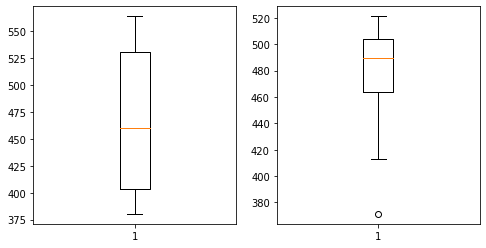

In [110]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(8,4))
ax[0].boxplot(pisa[pisa['Continent_Code']=='AS']['Math'])
ax[1].boxplot(pisa[pisa['Continent_Code']=='EU']['Math']);

In [111]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/daten/students_2014 - students_2014.csv')

In [112]:
df.head()

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,Smoking,Sprint,MileMinDur,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,3/22/1995,NaN,NaN,NaN,NaN,0.0,0,72.35,NaN,0.0,7.978,NaN,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
1,20278,1/1/1995,NaN,NaN,NaN,Philosophy,0.0,0,70.66,179.20,0.0,8.004,0:06:21,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
2,20389,12/31/1994,NaN,NaN,NaN,NaN,0.0,0,70.68,198.52,0.0,NaN,0:07:00,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0
3,22820,12/1/1994,NaN,NaN,NaN,business administration,1.0,0,NaN,198.34,NaN,8.473,0:12:44,74.06,88.68,55.89,73.16,In state,1.0,NaN,NaN,2.0,6.0
4,24559,11/10/1994,NaN,NaN,NaN,NaN,1.0,1,67.43,128.17,2.0,NaN,0:06:25,82.61,77.30,65.52,80.45,Out of state,1.0,NaN,NaN,7.0,3.0


In [113]:
# Ho : xbar_math = xbar_eng
# H1 : xbar_math != xbar_eng

In [114]:
ind_test = stats.ttest_rel(df.Math,df.English,nan_policy='omit')
ind_test

Ttest_relResult(statistic=-36.31256898171986, pvalue=3.071098719220689e-128)

In [115]:
if ind_test.pvalue < 0.05:
  print('there was a significant difference in the average of the two tests')
else:
  print('there wasn\'t a significant difference in the average of the two tests')

there was a significant difference in the average of the two tests
